Tugas 2 Bengkel Koding - DS01
- A11.2021.13212  - Angelica Widyastuti Kolo

### 1. Import Library
Tahap awal yaitu mengimpor pustaka (library) yang diperlukan.  
Library yang digunakan:
- pandas & numpy = manipulasi data  
- train_test_split = membagi dataset  
- DecisionTreeClassifier & LogisticRegression = algoritma klasifikasi  
- accuracy_score, precision_score, recall_score, f1_score = evaluasi model  
- matplotlib & seaborn = visualisasi confusion matrix

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

2. Load Dataset
Dataset yang digunakan adalah Census Income dari UCI Machine Learning Repository.  
Langkah ini memuat data, menampilkan jumlah baris–kolom, tipe data, dan statistik ringkas.


In [10]:
columns = [
    "age","workclass","fnlwgt","education","education_num",
    "marital_status","occupation","relationship","race","sex",
    "capital_gain","capital_loss","hours_per_week","native_country","income"
]

df = pd.read_csv("/content/adult.data", names=columns, sep=",", skipinitialspace=True)
print("Jumlah Baris dan Kolom:", df.shape)
print("\nTipe Data:")
print(df.dtypes)
print("\nStatistik Deskriptif:")
print(df.describe(include='all'))


Jumlah Baris dan Kolom: (32561, 15)

Tipe Data:
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

Statistik Deskriptif:
                 age workclass        fnlwgt education  education_num  \
count   32561.000000     32561  3.256100e+04     32561   32561.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22696           NaN     10501            NaN   
mean       38.581647       NaN  1.897784e+05       NaN      10.080679   
std        13.640433       NaN  1.055500e+05       NaN       2.572720   
min        17.000000       Na

### 3. Data Preparation (Tanpa Preprocessing)
Langkah ini meliputi:
1. Menghapus data kosong (“?”).  
2. Encoding fitur kategorikal menjadi numerik.  
3. Membagi dataset menjadi 80 % training dan 20 % testing.


In [11]:
from sklearn.preprocessing import LabelEncoder

df = df.replace('?', np.nan).dropna()

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

X = df.drop("income", axis=1)
y = df["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 4. Inisialisasi Model
Dua model yang digunakan:
- Decision Tree Classifier = model non-linear berbasis pohon.  
- Logistic Regression = model linear dengan probabilitas kelas 0/1.


In [12]:
dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

### 5. Pelatihan Model
Model dilatih menggunakan data training agar mengenali pola dalam dataset.

In [13]:
dt_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

### 6. Evaluasi Model
Evaluasi meliputi empat metrik: Accuracy, Precision, Recall, dan F1 Score.  
Berikut hasil untuk masing-masing model.


#### Model Decision Tree Classifier

=== Evaluasi Decision Tree ===
Accuracy: 0.8088844687551798
Precision: 0.8085971496552299
Recall: 0.8088844687551798
F1 Score: 0.8087395868625304

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      4503
           1       0.62      0.62      0.62      1530

    accuracy                           0.81      6033
   macro avg       0.75      0.75      0.75      6033
weighted avg       0.81      0.81      0.81      6033



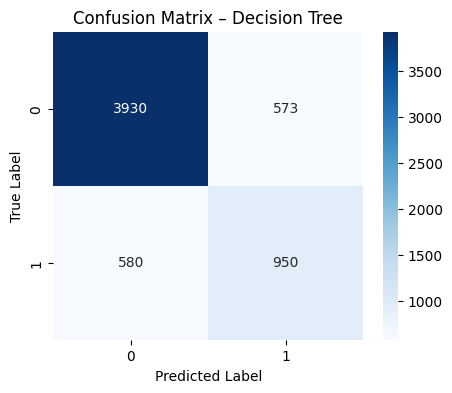

In [14]:
y_pred_dt = dt_model.predict(X_test)

print("=== Evaluasi Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix – Decision Tree')
plt.show()

#####  Dokumentasi Hasil Confusion Matrix – Decision Tree

Confusion Matrix di atas menunjukkan performa model **Decision Tree** dalam mengklasifikasikan pendapatan.

- True Negative (TN) = 3930 → data dengan pendapatan ≤50K yang berhasil diklasifikasikan dengan benar.
- False Positive (FP) = 573 → data pendapatan ≤50K yang salah diprediksi sebagai >50K.
- False Negative (FN) = 580 → data pendapatan >50K yang salah diprediksi sebagai ≤50K.
- True Positive (TP) = 950 → data pendapatan >50K yang diprediksi dengan benar.

Dari hasil tersebut dapat disimpulkan:
- Model lebih akurat dalam mengenali pendapatan ≤50K, yang merupakan kelas mayoritas dalam dataset.
- Kesalahan pada kelas >50K relatif seimbang antara FP dan FN, menandakan model cukup stabil.
- Dengan akurasi 80,88% dan nilai precision, recall, serta F1-score sekitar 0,81, model Decision Tree menunjukkan performa baik dan seimbang, mampu mengenali pola hubungan antara variabel demografis dan tingkat pendapatan dengan cukup efektif.


#### Model Logistic Regression

=== Evaluasi Logistic Regression ===
Accuracy: 0.803414553290237
Precision: 0.7898161755473473
Recall: 0.803414553290237
F1 Score: 0.7834360344879581

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88      4503
           1       0.70      0.40      0.51      1530

    accuracy                           0.80      6033
   macro avg       0.76      0.67      0.69      6033
weighted avg       0.79      0.80      0.78      6033



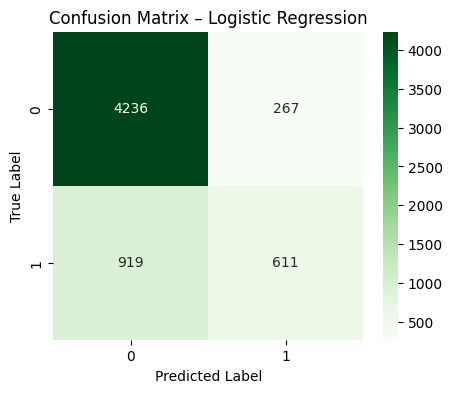

In [15]:
y_pred_lr = lr_model.predict(X_test)

print("=== Evaluasi Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix – Logistic Regression')
plt.show()

##### Dokumentasi Hasil Confusion Matrix – Logistic Regression

Confusion Matrix di atas menampilkan hasil prediksi model Logistic Regression pada data uji.

- True Negative (TN) = 4236 → Data pendapatan ≤50K yang diprediksi benar sebagai ≤50K.
- False Positive (FP) = 267 → Data pendapatan ≤50K yang salah diprediksi sebagai >50K.
- False Negative (FN) = 919 → Data pendapatan >50K yang salah diprediksi sebagai ≤50K.
- True Positive (TP) = 611 → Data pendapatan >50K yang diprediksi benar sebagai >50K.

Interpretasi hasil:
- Model sangat baik dalam mengenali kelas pendapatan rendah (≤50K), terbukti dari nilai TN yang tinggi (4236) dan recall kelas 0 sebesar 0.94.  
- Namun, model kurang optimal dalam mendeteksi kelas pendapatan tinggi (>50K)karena nilai FN besar (919), artinya banyak individu berpendapatan tinggi yang salah diklasifikasikan sebagai ≤50K.  
- Metrik evaluasi menunjukkan:
  - Accuracy: 0.803 (80,3%)  
  - Precision: 0.789  
  - Recall: 0.803  
  - F1 Score: 0.783  
- Secara keseluruhan, Logistic Regression memberikan performa yang cukup baik dan stabil, terutama untuk kelas mayoritas, namun masih perlu peningkatan agar lebih sensitif terhadap kelas minoritas (>50K).


### 7. Perbandingan Model

##### Perbandingan Dua Model: Decision Tree vs Logistic Regression

Berikut perbandingan hasil evaluasi kedua model terhadap dataset *Census Income*.

| Metrik Evaluasi | Decision Tree | Logistic Regression |
|:----------------|:--------------:|:-------------------:|
| **Accuracy** | 0.8089 | 0.8034 |
| **Precision** | 0.8086 | 0.7898 |
| **Recall** | 0.8089 | 0.8034 |
| **F1 Score** | 0.8087 | 0.7834 |

##### Analisis Perbandingan
1. **Akurasi (Accuracy)**  
   - Decision Tree memiliki akurasi sedikit lebih tinggi (**80.89%**) dibanding Logistic Regression (**80.34%**).  
   - Ini menunjukkan model Decision Tree lebih mampu mengenali pola kompleks dalam data.

2. **Precision & Recall**  
   - Precision dan Recall Decision Tree sedikit lebih baik, menandakan model ini lebih seimbang dalam mengklasifikasikan kedua kelas.  
   - Logistic Regression memiliki recall tinggi di kelas 0 (≤50K), tapi rendah di kelas 1 (>50K), sehingga total performanya lebih rendah.

3. **F1 Score**  
   - Decision Tree mencapai F1 Score **0.8087**, sedangkan Logistic Regression hanya **0.7834**.  
   - Artinya, Decision Tree memberikan keseimbangan lebih baik antara ketepatan (precision) dan kelengkapan (recall).

4. **Klasifikasi Antar Kelas (Berdasarkan Confusion Matrix)**  
   - Decision Tree: lebih seimbang, mampu mengenali pendapatan ≤50K dan >50K secara proporsional.  
   - Logistic Regression: sangat kuat untuk kelas ≤50K (recall = 0.94) tapi lemah pada kelas >50K (recall = 0.40).

##### Kesimpulan Perbandingan
- Secara keseluruhan, **Decision Tree Classifier unggul** dalam semua metrik utama (accuracy, precision, recall, dan F1).  
- **Logistic Regression** tetap stabil dan efisien, tetapi kurang optimal untuk mendeteksi kelas minoritas (pendapatan >50K).  
- Oleh karena itu, **Decision Tree merupakan model terbaik** untuk dataset *Census Income* karena lebih fleksibel menangkap pola non-linear antar variabel demografis.

### Kesimpulan

Berdasarkan hasil evaluasi dan perbandingan antara kedua model klasifikasi yang digunakan, yaitu Decision Tree Classifier dan Logistic Regression, dapat disimpulkan bahwa:

1. Decision Tree Classifier memberikan hasil yang lebih baik pada semua metrik evaluasi utama, dengan akurasi **80,88%**, precision **80,86%**, recall **80,88%**, dan F1-score **80,87%**.  
2. Sementara itu, **Logistic Regression** memperoleh akurasi **80,34%** dengan F1-score **78,34%**, namun performanya menurun pada kelas pendapatan tinggi (>50K) karena banyak data salah diklasifikasikan sebagai ≤50K.  
3. Secara keseluruhan, **Decision Tree lebih unggul** karena mampu menangkap pola non-linear antar variabel demografis yang kompleks pada dataset Census Income.  
4. **Logistic Regression** tetap baik dari sisi efisiensi dan interpretasi, namun kurang optimal pada data yang memiliki distribusi tidak seimbang (imbalanced data).  

#### Kesimpulan Akhir
Dengan demikian, model **Decision Tree Classifier** dipilih sebagai model terbaik untuk kasus prediksi pendapatan pada dataset Census Income, karena memberikan hasil yang lebih akurat dan seimbang dalam mengenali kedua kelas target.
